In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set_style('whitegrid')
%matplotlib inline
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

### 读取时间序列

In [18]:
goertek=pd.read_csv('../data/gertek_2016_d.csv')
goertek.head()

,date,open,high,close,low,...,ma10,ma20,v_ma5,v_ma10,v_ma20
0,2016-12-23,3333.40,3334.89,3307.60,3300.88,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
1,2016-12-22,3335.12,3340.36,3335.67,3322.72,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2,2016-12-21,3313.75,3342.48,3338.54,3313.75,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
3,2016-12-20,3328.30,3329.10,3309.06,3289.27,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
4,2016-12-19,3342.34,3344.86,3328.98,3325.00,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [19]:
type(goertek['date'])

pandas.core.series.Series

In [20]:
type(goertek['date'][0])

str

In [21]:
goertek['date']=pd.to_datetime(goertek['date'])
type(goertek['date'][0])

pandas.tslib.Timestamp

In [22]:
goertek=goertek.set_index('date')
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [23]:
type(goertek.index)

pandas.tseries.index.DatetimeIndex

In [24]:
goertek=pd.read_csv('../data/gertek_2016_d.csv',index_col='date',parse_dates=True)
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8


In [25]:
type(goertek.index)

pandas.tseries.index.DatetimeIndex

### DateOffset与TimeDelta

In [26]:
lastday=pd.datetime(2016,12,31)
lastday

datetime.datetime(2016, 12, 31, 0, 0)

In [29]:
newyear=lastday+pd.DateOffset(days=1)
newyear

Timestamp('2017-01-01 00:00:00')

In [30]:
today=pd.datetime.now()
today

datetime.datetime(2016, 12, 29, 21, 34, 59, 592988)

In [31]:
today+pd.DateOffset(weeks=1)

Timestamp('2017-01-05 21:34:59.592988')

In [32]:
today+2*pd.DateOffset(years=2, months=6)

Timestamp('2021-12-29 21:34:59.592988')

In [34]:
import datetime

In [36]:
weekDelta=datetime.timedelta(weeks=1)
weekDelta

datetime.timedelta(7)

In [37]:
datetime.timedelta(7)

datetime.timedelta(7)

In [38]:
today=pd.datetime.now()

In [39]:
today+weekDelta

datetime.datetime(2017, 1, 5, 21, 37, 21, 473187)

### 时间序列函数

In [40]:
goertek=goertek.sort_index(ascending=True)
goertek.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-05,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8
2016-01-06,3482.406,3543.739,3539.808,3468.467,145966144.0,...,3700.733,3711.603,126191462.4,136065387.2,142161998.0
2016-01-07,3481.150,3481.150,3294.384,3284.737,44102640.0,...,3643.533,3694.525,113886000.0,119773936.0,138700858.8
2016-01-08,3371.871,3418.851,3361.563,3237.931,185959456.0,...,3596.749,3681.449,130703180.8,123651742.4,141988050.4


In [41]:
goertek.tail()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-19,3342.34,3344.86,3328.98,3325.00,81640680.0,...,3410.735,3463.050,106497921.6,121751879.2,151401558.8
2016-12-20,3328.30,3329.10,3309.06,3289.27,87569592.0,...,3395.726,3455.085,99790819.2,118955928.8,147353865.6
2016-12-21,3313.75,3342.48,3338.54,3313.75,108255000.0,...,3382.005,3448.276,96640270.4,118346918.4,144647190.8
2016-12-22,3335.12,3340.36,3335.67,3322.72,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-23,3333.40,3334.89,3307.60,3300.88,97444712.0,...,3349.948,3429.937,93437446.4,110550392.0,139164898.4


In [42]:
goertek.shift(1).head(3)

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-01-05,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-06,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8


In [43]:
goertek.shift(1,freq=pd.datetools.bday).head(3)

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-05,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-06,3382.177,3518.217,3478.780,3377.280,162116992.0,...,3734.425,3715.763,117375344.0,139499139.2,141152744.8
2016-01-07,3482.406,3543.739,3539.808,3468.467,145966144.0,...,3700.733,3711.603,126191462.4,136065387.2,142161998.0


In [44]:
goertek.asfreq('BM')

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-29,2855.598,2965.309,2946.090,2854.371,113304256.0,...,3052.263,3178.529,110646072.0,111380396.8,122499499.2
2016-02-29,2939.580,2939.875,2877.467,2821.215,129341024.0,...,3026.766,2982.232,123694110.4,121202825.6,108902741.2
2016-03-31,3229.200,3241.927,3218.088,3208.665,121552072.0,...,3200.245,3138.345,107497318.4,138788992.8,129922554.0
2016-04-29,3153.537,3171.289,3156.745,3149.397,58029776.0,...,3180.772,3210.231,62888933.6,83644518.0,103044368.2
2016-05-31,3068.596,3170.926,3169.559,3068.596,138863104.0,...,3078.173,3094.970,75895244.0,69714819.6,74371733.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,3217.192,3225.418,3203.930,3198.683,88044840.0,...,3236.933,3235.643,102453550.4,95620234.4,112470896.4
2016-08-31,3310.565,3333.972,3327.793,3304.655,79570808.0,...,3330.161,3305.741,82890593.6,95886160.0,107540506.4
2016-09-30,3240.177,3260.940,3253.284,3239.036,44978024.0,...,3254.355,3279.082,54814162.4,57857660.8,72046803.6


In [45]:
goertek.asfreq('H',method='ffill')

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-01-04 00:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 01:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 02:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 03:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
2016-01-04 04:00:00,3725.856,3726.245,3469.066,3468.949,115370672.0,...,3773.143,3726.205,115749635.2,145030968.0,138741052.8
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22 20:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-22 21:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0
2016-12-22 22:00:00,3335.120,3340.360,3335.670,3322.720,92277248.0,...,3368.558,3440.622,92103587.2,115836250.4,141973738.0


In [46]:
goertek_m=pd.read_csv('../data/gertek_2016.csv',parse_dates=True,index_col='date')

In [47]:
goertek_m.head()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-12-22 15:00:00,3334.41,3335.63,3335.63,3332.22,7712410.0,...,3330.84,3331.32,5323810.0,4528870.0,5701990.0
2016-12-22 14:45:00,3339.31,3340.04,3334.36,3334.36,5514220.0,...,3330.25,3331.27,4604820.0,4151560.0,5685350.0
2016-12-22 14:30:00,3334.99,3339.39,3339.31,3332.52,4879690.0,...,3329.80,3331.50,4160060.0,4118640.0,5785230.0
2016-12-22 14:15:00,3331.56,3336.99,3335.10,3331.56,4383980.0,...,3328.52,3331.33,3909410.0,4263560.0,5786760.0
2016-12-22 14:00:00,3328.97,3331.21,3331.21,3328.01,4128750.0,...,3328.40,3331.38,3858020.0,4628960.0,5906510.0


In [51]:
goertek_resample=goertek_m.resample('30Min') #pandas 0.18 http://pandas.pydata.org/pandas-docs/version/0.18.0/whatsnew.html#resample-api

In [52]:
type(goertek_resample)

pandas.tseries.resample.DatetimeIndexResampler

In [50]:
goertek_resample.mean()

,open,high,close,low,volume,...,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,
2016-10-10 10:30:00,3263.620,3272.490,3272.120,3263.620,4251170.0,...,3260.320,3257.260,6711080.0,5132490.0,3723360.0
2016-10-10 11:00:00,3277.510,3280.080,3279.470,3276.810,4289200.0,...,3262.740,3258.580,4822160.0,5362790.0,3780180.0
2016-10-10 11:30:00,3279.470,3292.100,3291.250,3279.310,5250670.0,...,3265.930,3260.440,4565530.0,5557140.0,3905820.0
2016-10-10 12:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
2016-10-10 12:30:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22 13:00:00,3327.580,3328.270,3323.200,3323.120,3626460.0,...,3330.550,3331.650,4077220.0,6539310.0,6348340.0
2016-12-22 13:30:00,3324.625,3328.825,3327.610,3324.315,3703935.0,...,3328.815,3331.620,3716125.0,5723880.0,6146430.0
2016-12-22 14:00:00,3330.265,3334.100,3333.155,3329.785,4256365.0,...,3328.460,3331.355,3883715.0,4446260.0,5846635.0


+ B, BM: This stands for business day, business month. These are the working
days of the month, that is, any day that is not a holiday or a weekend.
+  D, W, M, Q, A: It stands for calendar day, week, month, quarter, year-end.
+  H, T, S, L, U: It stands for hour, minute, second, millisecond, and
microsecond.

### 股票数据案例

In [53]:
import tushare as ts
from datetime import datetime

In [ ]:
auto_list=['000625','600104','002594','601238']
#auto_var=['changan','sqjt','byd','gqjt']

In [3]:
#for stock,var in zip(auto_list,auto_var):
#    globals()[var] = ts.get_h_data(stock,'2016-01-01','2016-12-23')
changan=ts.get_h_data('000625','2016-01-01','2016-12-23')

[Getting data:]###

C:\Anaconda\envs\py35\lib\site-packages\tushare\stock\trading.py:446: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort('date', ascending=False)


In [4]:
sqjt=ts.get_h_data('600104','2016-01-01','2016-12-23')

[Getting data:]###

C:\Anaconda\envs\py35\lib\site-packages\tushare\stock\trading.py:446: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort('date', ascending=False)


In [5]:
byd=ts.get_h_data('002594','2016-01-01','2016-12-23')

[Getting data:]###

C:\Anaconda\envs\py35\lib\site-packages\tushare\stock\trading.py:446: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort('date', ascending=False)


In [6]:
gqjt=ts.get_h_data('601238','2016-01-01','2016-12-23')

[Getting data:]###

C:\Anaconda\envs\py35\lib\site-packages\tushare\stock\trading.py:446: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  df = df.sort('date', ascending=False)


In [54]:
#changan=pd.read_csv('../data/changan.csv',index_col='date',parse_dates=True)
changan.head()

,open,high,close,low,volume,amount
date,,,,,,
2016-12-23,15.25,15.25,15.03,14.99,17339349.0,261627029.0
2016-12-22,15.25,15.35,15.26,15.11,21042253.0,320306792.0
2016-12-21,15.12,15.27,15.25,15.09,18803404.0,285494781.0
2016-12-20,15.19,15.22,15.06,14.98,16265938.0,245299075.0
2016-12-19,15.28,15.33,15.17,15.12,14068049.0,214149866.0


In [55]:
changan.describe()

,open,high,close,low,volume,amount
count,219.000000,219.000000,219.000000,219.000000,2.190000e+02,2.190000e+02
mean,14.965479,15.166027,14.959863,14.776484,2.967817e+07,4.572622e+08
std,0.974644,0.977192,0.966045,0.980935,1.816421e+07,2.902145e+08
min,13.180000,13.380000,13.070000,12.790000,8.074326e+06,1.254679e+08
25%,13.970000,14.190000,13.960000,13.785000,1.739413e+07,2.612642e+08
50%,15.280000,15.500000,15.280000,15.090000,2.552496e+07,3.804228e+08
75%,15.715000,15.910000,15.715000,15.570000,3.458674e+07,5.210668e+08
max,16.710000,17.260000,16.770000,16.500000,1.360965e+08,2.020822e+09


In [56]:
changan.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 219 entries, 2016-12-23 to 2016-01-04
Data columns (total 6 columns):
open      219 non-null float64
high      219 non-null float64
close     219 non-null float64
low       219 non-null float64
volume    219 non-null float64
amount    219 non-null float64
dtypes: float64(6)
memory usage: 12.0 KB


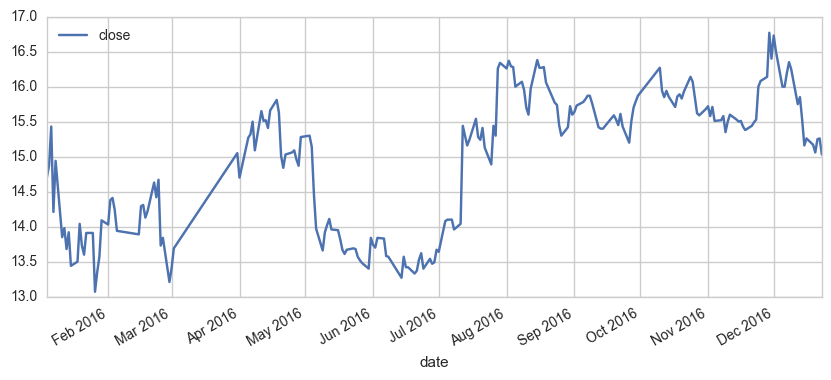

In [57]:
changan['close'].plot(legend=True,figsize=(10,4))

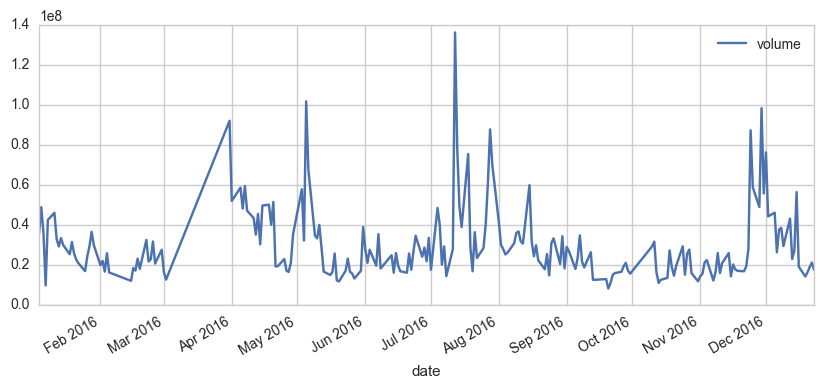

In [58]:
changan['volume'].plot(legend=True,figsize=(10,4))

In [60]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    changan[column_name] = changan['close'].rolling(window=ma).mean()
    #changan[column_name] = pd.rolling_mean(changan['close'],ma)

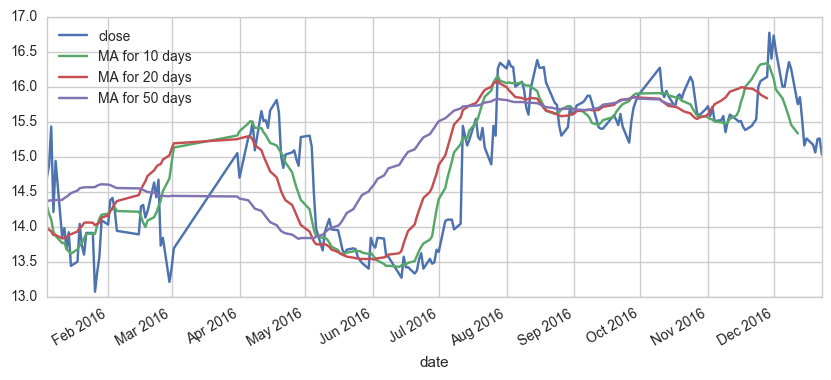

In [61]:
changan[['close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

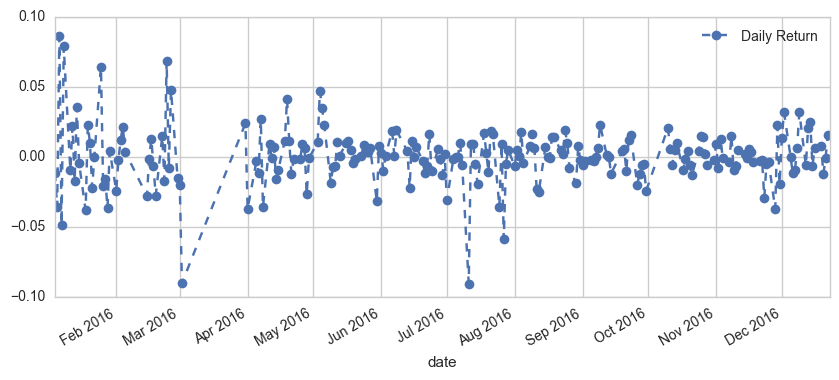

In [62]:
changan['Daily Return'] = changan['close'].pct_change()
changan['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')


C:\Anaconda\envs\py35\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


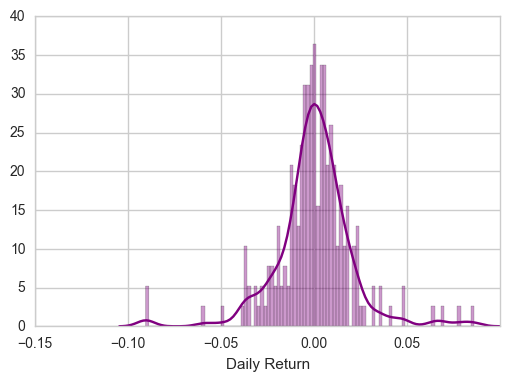

In [63]:
sns.distplot(changan['Daily Return'].dropna(),bins=100, color = 'purple');

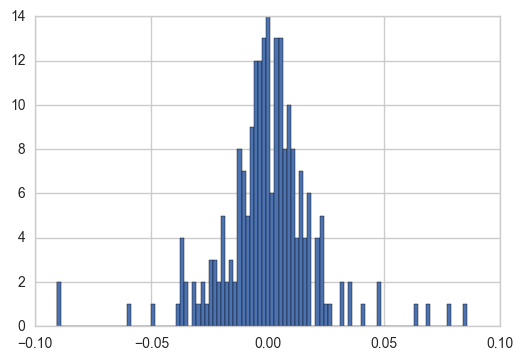

In [64]:
changan['Daily Return'].hist(bins=100)

In [ ]:
#gqjt=pd.read_csv('../data/gqjt_2016.csv',index_col='date',parse_dates=True)

In [65]:
closing_df = pd.DataFrame({'changan':changan['close'],'gqjt':gqjt['close'],'byd':byd['close']})

In [66]:
closing_df.head()

,byd,changan,gqjt
date,,,
2016-01-04,58.33,14.70,20.17
2016-01-05,58.92,14.87,20.95
2016-01-06,59.98,15.43,22.03
2016-01-07,55.01,14.21,20.25
2016-01-08,59.00,14.94,21.85


In [67]:
auto_rets = closing_df.pct_change()

In [68]:
auto_rets.head()

,byd,changan,gqjt
date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.010115,0.011565,0.038671
2016-01-06,0.017990,0.037660,0.051551
2016-01-07,-0.082861,-0.079067,-0.080799
2016-01-08,0.072532,0.051372,0.079012


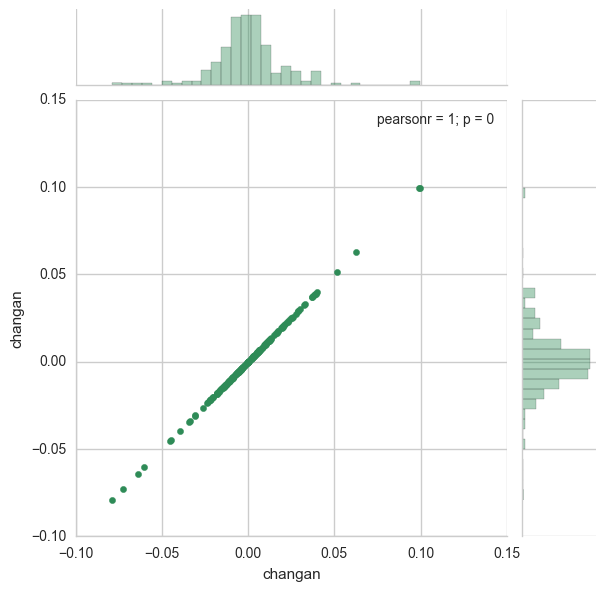

In [69]:
sns.jointplot('changan','changan',auto_rets,
              kind='scatter',color = 'seagreen')

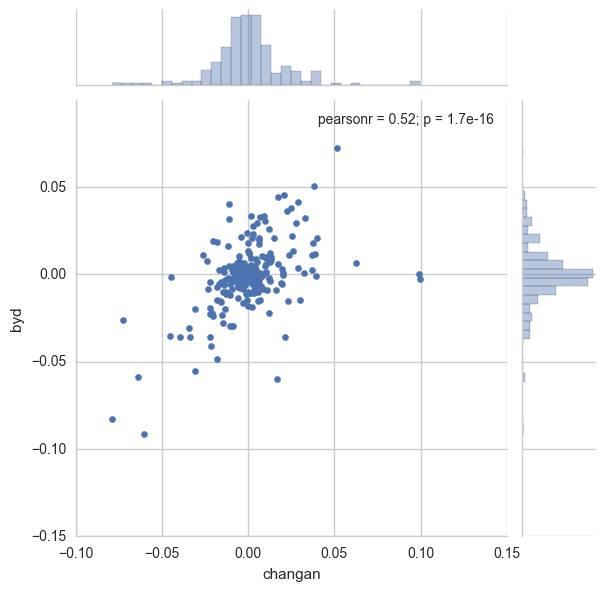

In [71]:
sns.jointplot('changan','byd',auto_rets,kind='scatter')

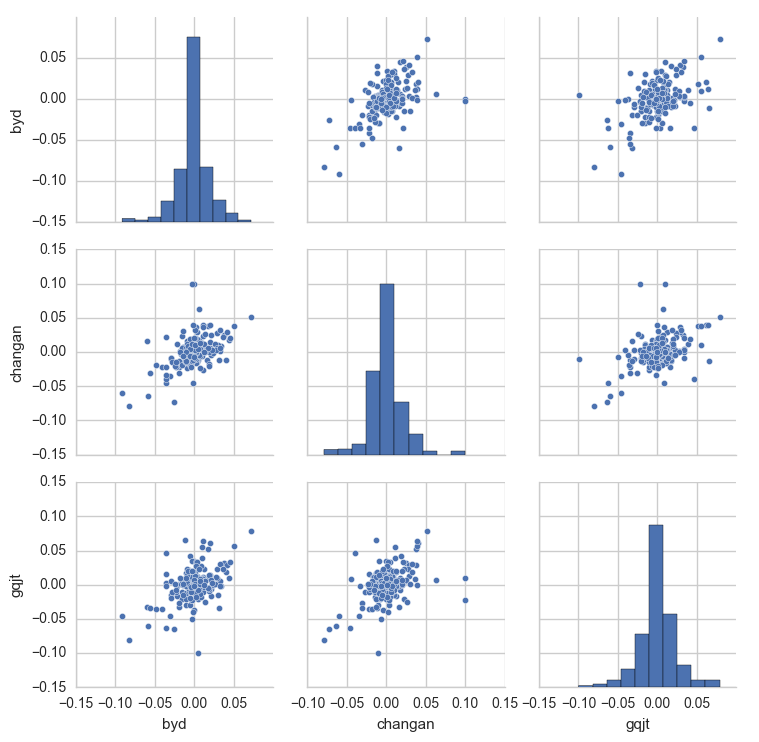

In [72]:
sns.pairplot(auto_rets.dropna())

In [80]:
sns.corrplot(closing_df,annot=True)

AttributeError: module 'seaborn' has no attribute 'corrplot'

In [87]:
corr=closing_df.corr()
corr

,byd,changan,gqjt
byd,1.000000,-0.008177,0.307989
changan,-0.008177,1.000000,0.503492
gqjt,0.307989,0.503492,1.000000


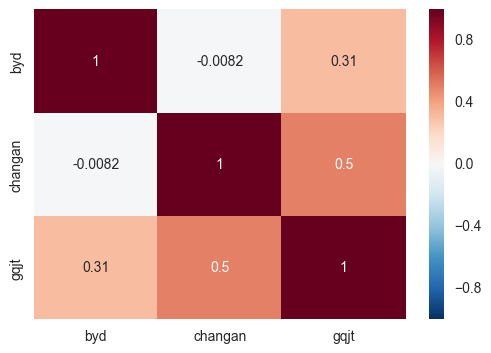

In [86]:
sns.heatmap(corr,annot=True)

In [81]:
sns.heatmap?